# Serie de Taylor

Una **secuencia** es un conjunto ordenado de números indicados por la lista de números entre paréntesis. Por ejemplo, $ s = (s_1, s_2, s_3, \cdots) $ significa que $ s $ es la secuencia $ s_1, s_2, s_3, \cdots $ y así sucesivamente. En este contexto, "ordenado" significa que $ s_1 $ viene *antes de* $ s_2 $, no que $ s_1 <s_2 $. Muchas secuencias tienen una estructura más complicada. Por ejemplo, $ s = (n ^ 2, n \in N) $ es la secuencia 0, 1, 4, 9, $ \cdots $. Una **serie** es la suma de una secuencia hasta cierto elemento. Una **secuencia infinita** es una secuencia con un número infinito de términos y una ** serie infinita ** es la suma de una secuencia infinita.


Una **expansión de Taylor** es una representación de una función mediante una serie infinita de polinomios alrededor de un punto. Matemáticamente, la serie de Taylor de una función, $ f (x) $, se define como:

$$ f(x) = \sum_{n = 0}^{\infty} \frac{f^{(n)}(a)(x-a)^n}{n!},
$$

donde $f^{(n)}$ es la $ n ^ \mathrm {th} $ derivada de $ f $ y $f^{(0)}$ es la función $ f $

Para aplicar series de Taylor apliquemos una expansión de $f(x) = 5x^2 + 3x + 5$ alrededor de $a = 0$, y $a = 1$. Verifiquemos que  $f$ y su expansión de Taylor son idénticas.

Primero calculamos la derivada analitica:

$$\begin{eqnarray*}
f(x) &=& 5x^2 + 3x + 5\\
f^{\prime}(x) &=& 10x + 3\\
f''(x) &=& 10
\end{eqnarray*}$$

Alrededor de a = 0:

$$f(x) = \frac{5x^0}{0!} + \frac{3x^1}{1!} + \frac{10x^2}{2!} + 0 + 0 + \cdots = 5x^2 + 3x + 5
$$

Alrededor de a = 1:

$$\begin{eqnarray*}
f(x) &=& \frac{13(x-1)^0}{0!} + \frac{13(x-1)^1}{1!} + \frac{10(x-1)^2}{2!} + 0 + \cdots\\
 &=& 13 + 13x - 13 + 5x^2 - 10x + 5 = 5x^2 + 3x + 5
\end{eqnarray*}$$

Notemos: que la expansion de Taylor de cualquier polinomio tiene un numero finito de terminos debido a que  $n^\mathrm{th}$ derivada de cualquier polinomio es 0 para $n$ lo suficientemente grande.


Intentemos escribir la serie de Taylor para $\sin(x)$ alrededor del punto $a = 0$.

Teniendo $f(x) = \sin(x)$. Aplicando la expansion de Taylor,
$$f(x) = \frac{\sin(0)}{0!}x^0 + \frac{\cos(0)}{1!}x^1 + \frac{-\sin(0)}{2!}x^2 + \frac{-\cos(0)}{3!}x^3 + \frac{\sin(0)}{4!}x^4 + \frac{\cos(0)}{5!}x^5 + \cdots.$$

La expansion puede ser escrita de manera compacta de la siguiente manera,

$$f(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!},
$$
De la cual se ignoran los que contienen  $\sin(0)$ (i.e., termino par). Sin embargo, debido a que estos términos se ignoran, los términos de esta serie y la expansión adecuada de la serie de Taylor están desfasados en un factor de $ 2n + 1 $; por ejemplo, el término $ n = 0 $ en la fórmula es el término $ n = 1 $ en la serie de Taylor, y el término $ n = 1 $ en la fórmula es el término $ n = 3 $ en la serie de Taylor.

## Aproximaciones con la serie de Taylor

Claramente, no es útil expresar funciones como sumas infinitas porque ni siquiera podemos calcularlas de esa manera. Sin embargo, a menudo es útil aproximar funciones usando una $ \textbf{ $N^{th}$ orden de aproximacion de serie de Taylor}$ de una función, que es un truncamiento de su expansión de Taylor en unos $ n = N $. Esta técnica es especialmente poderosa cuando hay un punto alrededor del cual tenemos conocimiento sobre una función para todas sus derivadas. Por ejemplo, si tomamos la expansión de Taylor de $ e ^ x $ alrededor de $ a = 0 $, entonces $ f ^ {(n)} (a) = 1 $ para todos los $ n $, ni siquiera tenemos que calcular las derivadas en la expansión de Taylor para aproximar $ e ^ x $!

Utilicemos Python para trazar la función seno junto con las aproximaciones de las series de Taylor de primer, tercer, quinto y séptimo orden. Tenga en cuenta que este es del cero al tercero en la fórmula dada anteriormente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

/tmp/ipykernel_1564/1421859367.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


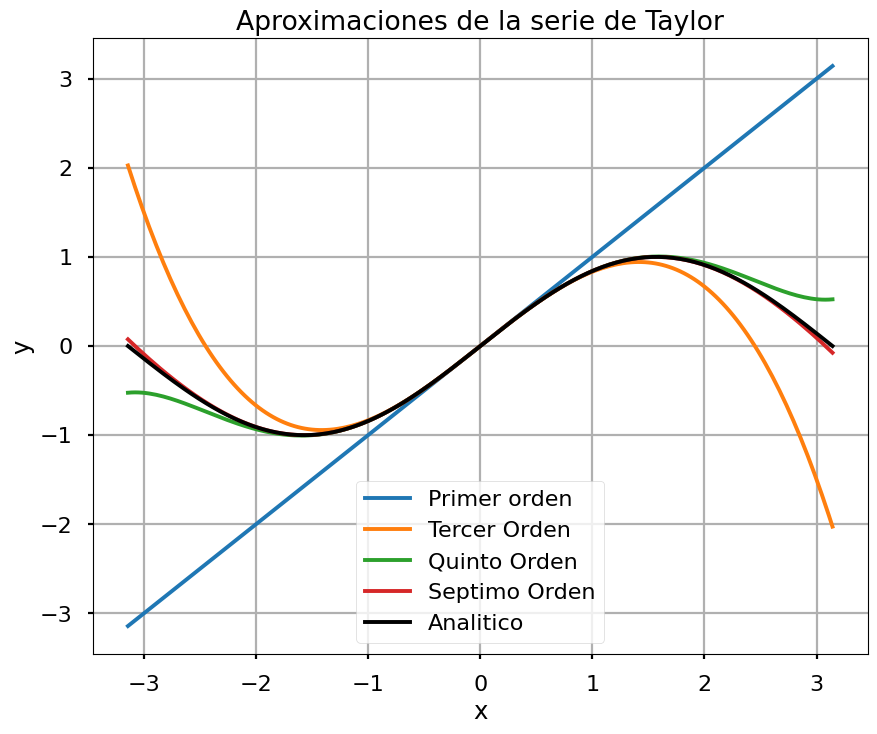

In [2]:
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['Primer orden', 'Tercer Orden', 'Quinto Orden', 'Septimo Orden']

plt.figure(figsize = (10,8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analitico')
plt.grid()
plt.title('Aproximaciones de la serie de Taylor')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Otra forma de resolver seria

In [3]:
from math import factorial
import numpy as np
import sympy as sp
from sympy.abc import x
import matplotlib.pyplot as plt

def taylor_series(f, a, n):
    # Initialize plot with exact solution
    fig, ax = plt.subplots()
    
    # Define x-axis value range for plotting
    X = np.linspace(-np.pi, np.pi, 100)
    Y = [f.subs(x, xp) for xp in X]
    ax.plot(X, Y, ':k', label='$sin(x)$')
    
    # Initialize fn
    fn = 0
    for i in range(n+1):
        # Get degree i-th derivative and evaluate at point a
        dfn = sp.diff(f, x, i)
        dfn_a = dfn.subs(x, a)
        
        # Add term to fn
        fn += dfn_a*(x-a)**i/factorial(i)
        
        if dfn_a != 0 or i == 0:
            # Plot function only if dfn_a is not zero
            Y = [fn.subs(x, xp) for xp in X]
            ax.plot(X, Y, label=r'$f_{}(x)$'.format(i), lw=0.9)
    
    # Use multiples of pi/2 to label ticks
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
               [r'$-\pi$', r'$-\frac{\pi}{2}$', '$0$',
                r'$\frac{\pi}{2}$', r'$\pi$'])
    
    ax.set_ylim(-1.2, 1.2)
    ax.legend()
    return fn

In [4]:
f = sp.sin(x)
a = 0
n = 9

##### fn = taylor_series(f, a, n)

Como puede ver, la aproximación se acerca rápidamente a la función analítica, incluso para $ x $ no cerca de $ a = 0 $. Tenga en cuenta que en el código anterior, también usamos una nueva función - *zip*, que puede permitirnos recorrer dos parámetros *range (4) * y *etiquetas* y usar eso en nuestro gráfico.

Calculamos la aproximación de la serie de Taylor de séptimo orden para $sin (x)$ alrededor de $ a = 0 $ en $x = \pi / 2$. Compare el valor con el valor correcto, 1.

In [5]:
x = np.pi/2
y = 0

for n in range(4):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    
print(y)

0.9998431013994987


La aproximación de la serie de Taylor de séptimo orden está muy cerca del valor teórico de la función incluso si se calcula lejos del punto alrededor del cual se calculó la serie de Taylor (es decir, $ x = \pi / 2 $ y $ a = 0 $) .


La aproximación de la serie de Taylor más común es la aproximación de primer orden, o **aproximación lineal**. Intuitivamente, para funciones "suaves", la aproximación lineal de la función alrededor de un punto, $ a $, se puede hacer tan buena como desee siempre que se mantenga lo suficientemente cerca de $ a $. En otras palabras, las funciones "suaves" se parecen cada vez más a una línea cuanto más se acerca un punto. Este hecho se representa en la siguiente figura, en la que trazamos niveles sucesivos de zoom de una función suave para ilustrar la naturaleza lineal de las funciones a nivel local. Las aproximaciones lineales son herramientas útiles al analizar funciones complicadas localmente.

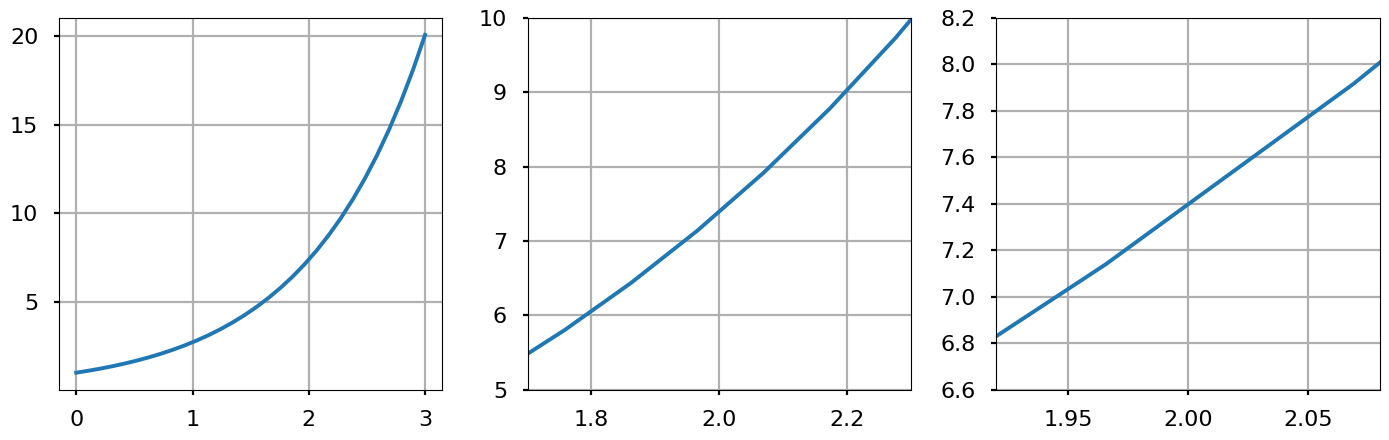

In [6]:
x = np.linspace(0, 3, 30)
y = np.exp(x)

plt.figure(figsize = (14, 4.5))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(x, y)
plt.grid()
plt.xlim(1.7, 2.3)
plt.ylim(5, 10)
plt.subplot(1, 3, 3)
plt.plot(x, y)
plt.grid()
plt.xlim(1.92, 2.08)
plt.ylim(6.6, 8.2)
plt.tight_layout()
plt.show()

Tomamos la aproximación lineal para $ e ^ x $ alrededor del punto $ a = 0 $. Utilice la aproximación lineal de $ e ^ x $ para aproximar el valor de $ e ^ 1 $ y $ e ^ {0.01} $. Utilice la función de Numpy *exp* para calcular *exp (1)* y *exp (0.01)* para la comparación.

La aproximación lineal de $ e ^ x $ alrededor de $ a = 0 $ es $ 1 + x $.

La función *exp* de Numpy da lo siguiente: :

In [7]:
np.exp(1)

2.718281828459045

In [8]:
np.exp(0.01)

1.010050167084168

La aproximación lineal de $ e ^ 1 $ es 2, que es inexacta, y la aproximación lineal de $ e ^{0.01} $ es 1.01, que es muy buena. Este ejemplo ilustra cómo la aproximación lineal se acerca a las funciones cercanas al punto alrededor del cual se toma la aproximación.